In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42) 

In [9]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [10]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [12]:
inertia = []
k_range = range(1, 11)

In [13]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [14]:
inertia

[1000.0000000000001,
 297.8954141051722,
 11.575484723104982,
 9.752067977356843,
 8.25717527244628,
 6.917577320416798,
 6.334755391595288,
 5.704177177901429,
 5.060234133532076,
 4.762361898130397]

Text(0.5, 0, 'Number of clusters (k)')

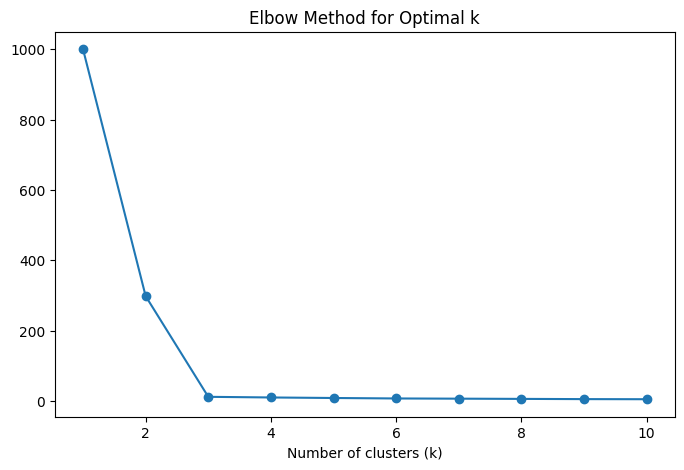

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')

In [16]:
final_kmeans = KMeans(n_clusters=3, random_state=42)

In [17]:
cluster_labels = final_kmeans.fit_predict(X_scaled)

In [18]:
df['cluster'] = cluster_labels

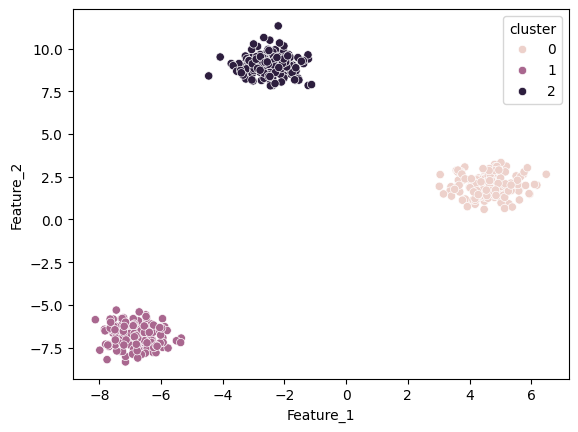

In [20]:
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='cluster')
plt.show()